### 라이브러리 임포트

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torchvision
import torch
import cv2
import torch.nn as nn
from torchsummary import summary as summary

### 데이터 불러오기

In [2]:
bird_df = pd.read_csv('birds.csv')
class_dict_df = pd.read_csv('class_dict.csv')
latin_name_df = pd.read_csv('birds latin names.csv')

### 각 데이터프레임 정보 확인

In [3]:
bird_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62388 entries, 0 to 62387
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class index  62388 non-null  int64 
 1   filepaths    62388 non-null  object
 2   labels       62388 non-null  object
 3   data set     62388 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


In [4]:
bird_df.head()

,class index,filepaths,labels,data set
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train
1,0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train
2,0,train/ABBOTTS BABBLER/003.jpg,ABBOTTS BABBLER,train
3,0,train/ABBOTTS BABBLER/004.jpg,ABBOTTS BABBLER,train
4,0,train/ABBOTTS BABBLER/005.jpg,ABBOTTS BABBLER,train


In [5]:
class_dict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class_index  400 non-null    int64 
 1   class        400 non-null    object
 2   height       400 non-null    int64 
 3   width        400 non-null    int64 
 4   scale by     400 non-null    int64 
 5   Offset       400 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 18.9+ KB


In [6]:
class_dict_df.head()

,class_index,class,height,width,scale by,Offset
0,0,ABBOTTS BABBLER,112,112,1,0
1,1,ABBOTTS BOOBY,112,112,1,0
2,2,ABYSSINIAN GROUND HORNBILL,112,112,1,0
3,3,AFRICAN CROWNED CRANE,112,112,1,0
4,4,AFRICAN EMERALD CUCKOO,112,112,1,0


In [7]:
latin_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   class_index      400 non-null    int64 
 1   class            400 non-null    object
 2   SCIENTIFIC NAME  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


In [8]:
latin_name_df.head()

,class_index,class,SCIENTIFIC NAME
0,0,ABBOTTS BABBLER,Malacocincla abbotti
1,1,ABBOTTS BOOBY,Papasula abbotti
2,2,ABYSSINIAN GROUND HORNBILL,Bucorvus abyssinicus
3,3,AFRICAN CROWNED CRANE,Balearica regulorum
4,4,AFRICAN EMERALD CUCKOO,Chrysococcyx cupreus


### 클래스 수 확인

In [9]:
len(latin_name_df)

400

In [10]:
bird_df['labels'].nunique()

401

In [11]:
class_dict_df['class'].nunique()

400

In [12]:
bird_df['labels'].unique()

array(['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL',
       'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO',
       'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'ALBATROSS',
       'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH',
       'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN',
       'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL',
       'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMETHYST WOODSTAR',
       'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA',
       'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA',
       'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY THRUSHBIRD',
       'ASIAN CRESTED IBIS', 'AVADAVAT', 'AZURE JAY', 'AZURE TANAGER',
       'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS',
       'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT',
       'BAND TAILED GUAN', 'BANDED BROADBILL', 'BANDED PITA',
       'BANDED STILT', 'BAR-TAILED GODWIT', 'BARN OWL', 'BARN SWAL

In [13]:
i=0
for cls_name in bird_df['labels'].unique():
    i+=1
    print(cls_name)
    print(i)
    for label_name in class_dict_df['class'].unique():
        if cls_name == label_name:
            print(cls_name)

ABBOTTS BABBLER
1
ABBOTTS BABBLER
ABBOTTS BOOBY
2
ABBOTTS BOOBY
ABYSSINIAN GROUND HORNBILL
3
ABYSSINIAN GROUND HORNBILL
AFRICAN CROWNED CRANE
4
AFRICAN CROWNED CRANE
AFRICAN EMERALD CUCKOO
5
AFRICAN EMERALD CUCKOO
AFRICAN FIREFINCH
6
AFRICAN FIREFINCH
AFRICAN OYSTER CATCHER
7
AFRICAN OYSTER CATCHER
ALBATROSS
8
ALBATROSS
ALBERTS TOWHEE
9
ALBERTS TOWHEE
ALEXANDRINE PARAKEET
10
ALEXANDRINE PARAKEET
ALPINE CHOUGH
11
ALPINE CHOUGH
ALTAMIRA YELLOWTHROAT
12
ALTAMIRA YELLOWTHROAT
AMERICAN AVOCET
13
AMERICAN AVOCET
AMERICAN BITTERN
14
AMERICAN BITTERN
AMERICAN COOT
15
AMERICAN COOT
AMERICAN GOLDFINCH
16
AMERICAN GOLDFINCH
AMERICAN KESTREL
17
AMERICAN KESTREL
AMERICAN PIPIT
18
AMERICAN PIPIT
AMERICAN REDSTART
19
AMERICAN REDSTART
AMETHYST WOODSTAR
20
AMETHYST WOODSTAR
ANDEAN GOOSE
21
ANDEAN GOOSE
ANDEAN LAPWING
22
ANDEAN LAPWING
ANDEAN SISKIN
23
ANDEAN SISKIN
ANHINGA
24
ANHINGA
ANIANIAU
25
ANIANIAU
ANNAS HUMMINGBIRD
26
ANNAS HUMMINGBIRD
ANTBIRD
27
ANTBIRD
ANTILLEAN EUPHONIA
28
ANTILLEAN EUPHONIA

### 데이터 이미지화

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


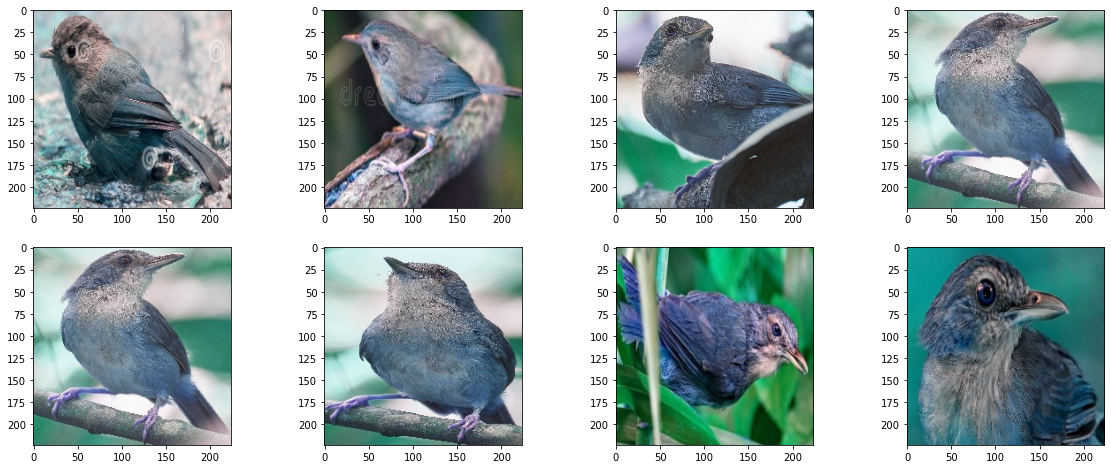

In [14]:
plt.figure(figsize=(20, 8))
for i, path in enumerate(bird_df['filepaths'][0:8].tolist()):
    img = cv2.imread(path)
    print(img.shape)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
plt.show()

### 데이터셋 및 데이터로드 구축

In [24]:
transform = torchvision.transforms.Compose([
                                    torchvision.transforms.RandomCrop(200),
                                    torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

train_dst = torchvision.datasets.ImageFolder('./train', transform=transform)
valid_dst = torchvision.datasets.ImageFolder('./valid', transform=transform)
test_dst = torchvision.datasets.ImageFolder('./test', transform=transform)

In [26]:
train_dl = torch.utils.data.DataLoader(train_dst, batch_size=32, shuffle=True)
valid_dl = torch.utils.data.DataLoader(valid_dst, batch_size=32, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_dst, shuffle=True)

### 모델 구축

In [17]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = self.conv_block(3, 128, pad=1)
        self.conv2 = self.conv_block(128, 64, k_size=1)
        self.conv3 = self.conv_block(64, 64, pad=1, str=2)
        self.conv4 = self.conv_block(64, 32, k_size=1)
        self.conv5 = self.conv_block(32, 64, pad=1)
        self.maxpool1 = nn.MaxPool2d(2,2)
        
        self.conv6 = self.conv_block(64, 128, pad=1)
        self.conv7 = self.conv_block(128, 64, k_size=1)
        self.conv8 = self.conv_block(64, 64, pad=1, str=2)
        self.conv9 = self.conv_block(64, 32, k_size=1)
        self.conv10 = self.conv_block(32, 64, pad=1)
        self.maxpool2 = nn.MaxPool2d(2,2)
        
        self.conv11 = self.conv_block(64, 128, pad=1)
        self.conv12 = self.conv_block(64, 32, k_size=1)
        self.conv13 = self.conv_block(32, 64, pad=1)
        self.conv14 = self.conv_block(64, 32, k_size=1)
        self.conv15 = self.conv_block(32, 64, pad=1)
        self.maxpool3 = nn.MaxPool2d(2,2)

        self.conv16 = self.conv_block(128, 256, pad=1)
        self.conv17 = self.conv_block(128, 64, k_size=1)
        self.conv18 = self.conv_block(64, 128, pad=1)
        self.conv19 = self.conv_block(128, 64, k_size=1)
        self.conv20 = self.conv_block(64, 128, pad=1)
        self.maxpool4 = nn.MaxPool2d(2,2)


        self.fc1 = self.fc_block(2304, 1024)
    
    def conv_block(self, c_in, c_out, k_size=3, pad=0, str=1):
        conv2d_block = nn.Sequential(
            nn.Conv2d(in_channels=c_in, out_channels=c_out, padding=pad, stride=str, kernel_size=k_size),
            nn.BatchNorm2d(num_features=c_out),
            nn.ReLU(),
            
        )
        return conv2d_block

    def fc_block(self, c_in, c_out, n_cls=400, p=0.5):
        fc_l_block = nn.Sequential(
            nn.Linear(c_in, c_out),
            nn.ReLU(),
            nn.Dropout(p=p),
            nn.Linear(c_out, c_out//2),
            nn.ReLU(),
            nn.Dropout(p=p),
            nn.Linear(c_out//2, n_cls)
        )
        return fc_l_block
    
    def forward(self, x):

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.maxpool1(x)

        x = self.conv6(x)
        x = self.conv7(x)
        x = self.conv8(x)
        x = self.conv9(x)        
        x = self.conv10(x)
        x = self.maxpool2(x)
        
        x = self.conv11(x)
        x_li = x.chunk(2, dim=1)
        x = self.conv12(x_li[1])
        x = self.conv13(x)
        x = self.conv14(x)
        x = self.conv15(x)
        x = torch.cat([x_li[0], x], dim=1)
        x = self.maxpool3(x)

        x = self.conv16(x)
        x_li = x.chunk(2, dim=1)
        x = self.conv17(x_li[1])
        x = self.conv18(x)
        x = self.conv19(x)
        x = self.conv20(x)
        x = torch.cat([x_li[0], x], dim=1)
        x = self.maxpool4(x)

        #print(x.size())

        x = torch.flatten(x, 1)
        
        x = self.fc1(x)
        
        return x

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(f'{device} is available')
net = Net().to(device)

print(net)

cuda:0 is available
Net(
  (conv1): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv2): Sequential(
    (0): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv3): Sequential(
    (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv4): Sequential(
    (0): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (conv5): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_st

### 모델 크기 확인

In [18]:
summary(net, (3, 200, 200), batch_size=32)
output = net(torch.randn(32, 3, 200, 200).to(device))
#print(output)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1        [32, 128, 200, 200]           3,584
       BatchNorm2d-2        [32, 128, 200, 200]             256
              ReLU-3        [32, 128, 200, 200]               0
            Conv2d-4         [32, 64, 200, 200]           8,256
       BatchNorm2d-5         [32, 64, 200, 200]             128
              ReLU-6         [32, 64, 200, 200]               0
            Conv2d-7         [32, 64, 100, 100]          36,928
       BatchNorm2d-8         [32, 64, 100, 100]             128
              ReLU-9         [32, 64, 100, 100]               0
           Conv2d-10         [32, 32, 100, 100]           2,080
      BatchNorm2d-11         [32, 32, 100, 100]              64
             ReLU-12         [32, 32, 100, 100]               0
           Conv2d-13         [32, 64, 100, 100]          18,496
      BatchNorm2d-14         [32, 64, 1

### 하이퍼파라미터 정의

In [19]:
import torch.optim as optim

lr = 0.001
epochs = 80

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=lr)

### train & validation 함수 정의

In [20]:
import torch.nn.functional as F

def train(model, train_dl, optimizer):
    
    model.train()
    train_loss = 0
    
    for batch_idx, (data, target) in enumerate(train_dl):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        train_loss += F.cross_entropy(output, target, reduction='sum').item()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dl.dataset)
    
    return train_loss
        
def eval(model, test_dl):
    
    model.eval()
    
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_dl):
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_dl.dataset)
    test_accuracy = 100. * correct / len(test_dl.dataset)
    
    return test_loss, test_accuracy

### Training

In [21]:
for epoch in range(1, epochs + 1):
    train_loss = train(net, train_dl, optimizer)
    test_loss, test_accuracy = eval(net, valid_dl)
    
    print('[{}] Train Loss: {:.4f}'.format(epoch, train_loss))
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'.format(epoch, test_loss, test_accuracy))

[1] Train Loss: 5.7273
[1] Test Loss: 5.3135, Accuracy: 1.85%
[2] Train Loss: 5.1853
[2] Test Loss: 4.5238, Accuracy: 6.80%
[3] Train Loss: 4.6154
[3] Test Loss: 3.8384, Accuracy: 15.60%
[4] Train Loss: 4.1693
[4] Test Loss: 3.2887, Accuracy: 26.65%
[5] Train Loss: 3.8174
[5] Test Loss: 2.8912, Accuracy: 32.80%
[6] Train Loss: 3.5030
[6] Test Loss: 2.5135, Accuracy: 41.50%
[7] Train Loss: 3.2620
[7] Test Loss: 2.3488, Accuracy: 43.95%
[8] Train Loss: 3.0512
[8] Test Loss: 2.1161, Accuracy: 48.30%
[9] Train Loss: 2.8741
[9] Test Loss: 1.9104, Accuracy: 53.05%
[10] Train Loss: 2.7347
[10] Test Loss: 1.7582, Accuracy: 57.45%
[11] Train Loss: 2.5848
[11] Test Loss: 1.6407, Accuracy: 60.20%
[12] Train Loss: 2.4699
[12] Test Loss: 1.5836, Accuracy: 62.10%
[13] Train Loss: 2.3822
[13] Test Loss: 1.5163, Accuracy: 62.55%
[14] Train Loss: 2.2971
[14] Test Loss: 1.5024, Accuracy: 62.55%
[15] Train Loss: 2.2066
[15] Test Loss: 1.3462, Accuracy: 67.10%
[16] Train Loss: 2.1498
[16] Test Loss: 1.415

### 모델 저장

In [23]:
def save_checkpoint(directory, state, filename='latest_1.tar.gz'):
    
    model_filename = os.path.join(directory, filename)
    torch.save(state, model_filename)
    print("=> saving checkpoint")

save_checkpoint('./weights/', {
    'epoch': epoch,
    'model': net,
    'state_dict': net.state_dict(),
    'optimizer': optimizer.state_dict(),
})

=> saving checkpoint


### Test

In [31]:
def test(model, test_dl):
    
    model.eval()
    
    #test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_dl):
            data, target = data.to(device), target.to(device)
            output = model(data)
            #test_loss += F.cross_entropy(output, target, reduction='sum').item()
            pred = output.max(1, keepdim=True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    #test_loss /= len(test_dl.dataset)
    test_accuracy = 100. * correct / len(test_dl.dataset)
    
    return test_accuracy

test_accuracy = test(net, test_dl)
print('Accuracy: {:.2f}%'.format(test_accuracy))

85.2
Accuracy: 85.20%
